In [138]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

warnings.filterwarnings("ignore")


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

In [139]:
csv_path = 'data/order_data_V2.csv'  # Update with the path to your CSV file
df = pd.read_csv(csv_path)

df

,order_id,customer_id,product_id,distance,product_rating,date,review,time_taken,place_id,product,product_description,product_type,place_type,place_name,place_address,place_phone_no
0,0,363,2411,3.08,5,24-11-22,1,16,67,Moin/Moi Moi,"A traditional food made from beans, peppers, spices, and seasonings. This inexpensive and nutritious meal can be served any time of the day. Asides from the special note it adds as a side dish, it is common street food in Nigeria that s loved by adults and kids.",meal,restaurant,Topever Restaurant,"39, Market Street, Shomolu, Shomolu, Lagos, Nigeria","0806 209 8455, 0803 488 6706"
1,1,593,3535,9.42,5,11-11-22,1,24,78,Meat Pie,"A mix of flour, butter, salt, sugar, baking powder, and egg batter kneaded and filled with seasoned ground beef, carrots and potatoes make a comfort snack for you. Whether you are eating it as brunch, breakfast, or snack, you will enjoy this light and flaky delicacy.",snacks,cafes,Ziya Delicacy Boutique,"26B Oju Olobun Cl, Lagos, Nigeria",NaN
2,2,489,1131,4.97,5,3-6-22,1,19,84,Zobo,"Zobo is made by boiling the hibiscus plant flower in water together with other ingredients such as ginger, garlic, pineapple and the rest of them you wish to add to your own taste.",drink,cafes,Cafe One Yaba,"E-Center, 1-11 Commercial Ave, Sabo, Yaba, Lagos, Nigeria",NaN
3,3,901,2376,33.60,3,12-5-22,0,57,65,Ewedu – Jute Leaves Soup,"This is a unique soup made from jute leaves. An easy-make soup with a slimy texture to aid the eating of swallows like eba, amala and semo. This green soup is rich and delicious. You can serve it with beans soup, beef, fish, or chicken stew.",meal,restaurant,Sweetspot Eatery And African Dishes,"20, Oladoyinbo Street, Ikeja, Lagos, Nigeria","0703 384 2618, 0807 595 3779"
4,4,822,1979,21.44,1,7-9-22,-1,43,42,Yam Pottage/Yam Porridge,"This yam recipe uses puna yam boiled and mashed with pepper mix blend, onions, seasoning, and palm oil. It has a bright color with an amazing taste. Garnish it with any leafy vegetable and serve it with the protein of your choice.",meal,restaurant,Karma Restaurant,"17, Burma Road, Apapa, Lagos, Nigeria","0816 569 6021, 0909 034 9081"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9019,9019,607,83,9.61,5,10-5-22,1,27,6,Pineapple Drink,"Made with the normally discarded bits of pineapple – the skin and core, this has a distinct, clear pineapple flavour. Spice with cloves, ginger and other aromatics.",drink,restaurant,Appetizers Restaurant,"66 Ijaiye Road, Suite 33, Assembly Spot Complex, Ikeja, Lagos, Nigeria",0803 727 7483
9020,9020,188,1597,18.10,4,13-9-22,1,32,20,Jollof Spaghetti,"This is not a regular everyday spaghetti that you eat with ready-made stew. It is a one-pot stewed spaghetti recipe made with aromatics, vegetable oil, and pepper. You can stir your choice of protein and eat it for lunch or dinner.",meal,restaurant,China Town Express Restaurant,"14 Idowu Martins Street, Lagos Island, Lagos, Nigeria","0704 095 4224, 0806 454 2582"
9021,9021,72,1844,23.74,5,23-9-22,1,28,34,Pounded Yam,"We call this the king of swallows. It is made from African yam pounded till perfectly smooth and served like a dough. Pounded yam is paired with African soups like egusi, okro soup, and stewed spinach.",meal,restaurant,Enjoyurmouth.com,"Lekki Ajah, Lagos, Lagos State Nigeria",088034310244
9022,9022,169,937,46.17,3,25-1-22,0,60,73,Soya Milk,"Soya Milk is a refreshing nutritious drink made from plant protein. It made from soya beans, and is also very delicious. Soy milk is rich in sodium, potassium, calcium and iron.",drink,cafes,MyYa’s Cafe,"Plot 1, Block, 4 Admiralty Rd, Lekki Phase I, Lagos, Nigeria",NaN


In [140]:
# shape of the data
df.shape

(9024, 16)

In [141]:
df.columns

Index(['order_id', 'customer_id', 'product_id', 'distance', 'product_rating',
       'date', 'review', 'time_taken', 'place_id', 'product',
       'product_description', 'product_type', 'place_type', 'place_name',
       'place_address', 'place_phone_no'],
      dtype='object')

In [142]:
# dropping some columns
columns = ['order_id', 'place_id', 'product_id',
       'place_address', 'place_phone_no']
df.drop(columns=columns, inplace=True)

In [143]:
df.tail()

,customer_id,distance,product_rating,date,review,time_taken,product,product_description,product_type,place_type,place_name
9019,607,9.61,5,10-5-22,1,27,Pineapple Drink,"Made with the normally discarded bits of pineapple – the skin and core, this has a distinct, clear pineapple flavour. Spice with cloves, ginger and other aromatics.",drink,restaurant,Appetizers Restaurant
9020,188,18.10,4,13-9-22,1,32,Jollof Spaghetti,"This is not a regular everyday spaghetti that you eat with ready-made stew. It is a one-pot stewed spaghetti recipe made with aromatics, vegetable oil, and pepper. You can stir your choice of protein and eat it for lunch or dinner.",meal,restaurant,China Town Express Restaurant
9021,72,23.74,5,23-9-22,1,28,Pounded Yam,"We call this the king of swallows. It is made from African yam pounded till perfectly smooth and served like a dough. Pounded yam is paired with African soups like egusi, okro soup, and stewed spinach.",meal,restaurant,Enjoyurmouth.com
9022,169,46.17,3,25-1-22,0,60,Soya Milk,"Soya Milk is a refreshing nutritious drink made from plant protein. It made from soya beans, and is also very delicious. Soy milk is rich in sodium, potassium, calcium and iron.",drink,cafes,MyYa’s Cafe
9023,635,24.70,5,22-3-22,1,42,Gala,"Gala, a popular on-the-go snack, has become synonymous with convenience and flavor. These savory meat pies consist of a flaky pastry crust filled with a well-seasoned mixture of minced meat, vegetables, and spices.",snacks,restaurant,Emperor's Hotels & Restaurant


In [144]:
# new shape
df.shape

(9024, 11)

In [145]:
# description
df.describe()

,customer_id,distance,product_rating,review,time_taken
count,9024.000000,9024.000000,9024.000000,9024.000000,9024.000000
mean,479.090093,20.439285,3.490913,0.196476,34.318373
std,275.012228,12.295147,1.442966,0.874519,13.469799
min,0.000000,0.900000,1.000000,-1.000000,10.000000
25%,244.000000,9.917500,2.000000,-1.000000,24.000000
50%,482.000000,19.610000,3.000000,0.000000,33.000000
75%,717.000000,28.355000,5.000000,1.000000,43.000000
max,956.000000,46.990000,5.000000,1.000000,70.000000


In [146]:
# check for missing values
df.isnull().sum()

customer_id            0
distance               0
product_rating         0
date                   0
review                 0
time_taken             0
product                0
product_description    0
product_type           0
place_type             0
place_name             0
dtype: int64

#### There is no emty cell in the data

In [147]:
# check for duplicate values
df.duplicated().sum()

0

In [148]:
# checking for correct data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9024 entries, 0 to 9023
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          9024 non-null   int64  
 1   distance             9024 non-null   float64
 2   product_rating       9024 non-null   int64  
 3   date                 9024 non-null   object 
 4   review               9024 non-null   int64  
 5   time_taken           9024 non-null   int64  
 6   product              9024 non-null   object 
 7   product_description  9024 non-null   object 
 8   product_type         9024 non-null   object 
 9   place_type           9024 non-null   object 
 10  place_name           9024 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 775.6+ KB


### **comment:**
date column should have datetime data type

In [149]:
## changing data type for the date column
df["date"] = pd.to_datetime(df["date"], format="%d-%m-%y")

In [150]:
# confirm changes
df["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9024 entries, 0 to 9023
Series name: date
Non-Null Count  Dtype         
--------------  -----         
9024 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 70.6 KB


# **EXPLORATORY DATA ANALYSIS**


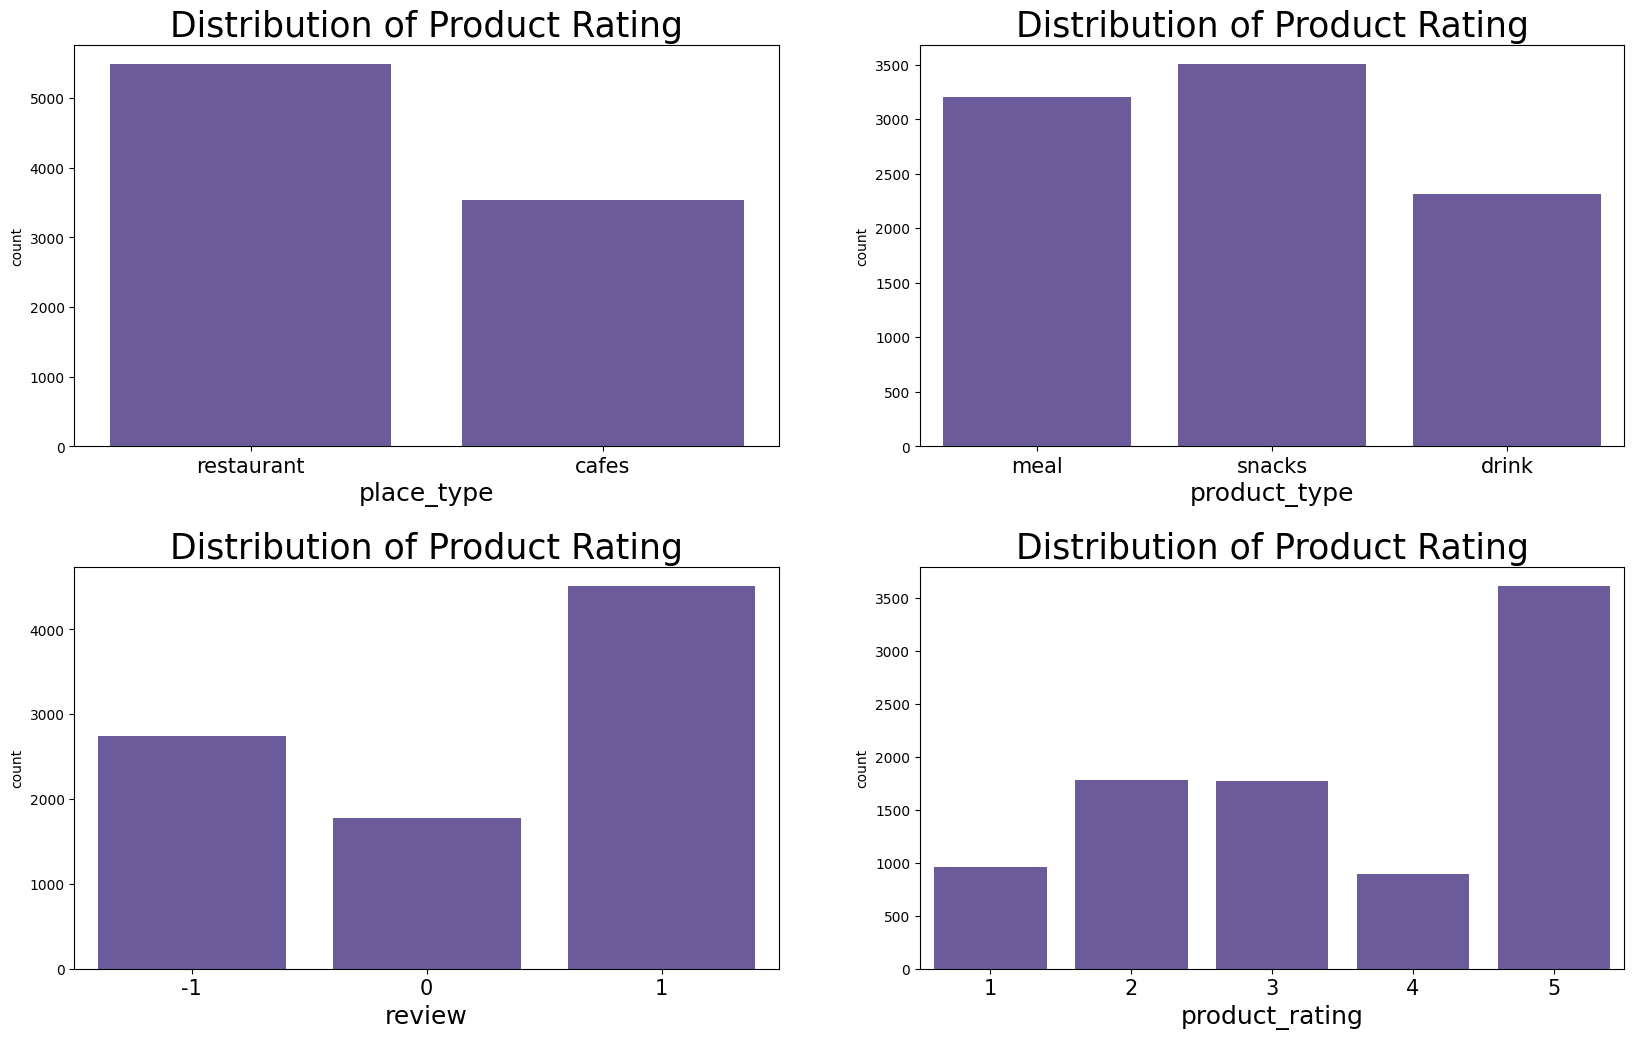

In [151]:
nrows, ncols = 2, 2
figsize = (20, 12)
fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
feat = ["place_type", "product_type", "review", "product_rating"]
for idx, val in enumerate(feat):
    if nrows > 1:
        ax = axs[(idx // ncols), (idx % ncols)]
    else:
        ax = axs[idx]

    title = ["Place Type", "Product Type", "Review", "Product Rating"]
    for i in title:
        sns.countplot(x=val, data=df, ax=ax, color="#6750A4")
        ax.set_title(f"Distribution of {i}", size=25)
        ax.set_xlabel(val, size=18)
        ax.tick_params(axis='x', labelsize=15)
        plt.subplots_adjust(hspace=0.3)


# INSIGHTS
* Restaurant receive more order than cafe
* Snacks have the highest number of orders, followed by meals and  then drinks
* Positive review has the highest count among all the review
* The rating “5” has the highest frequncy



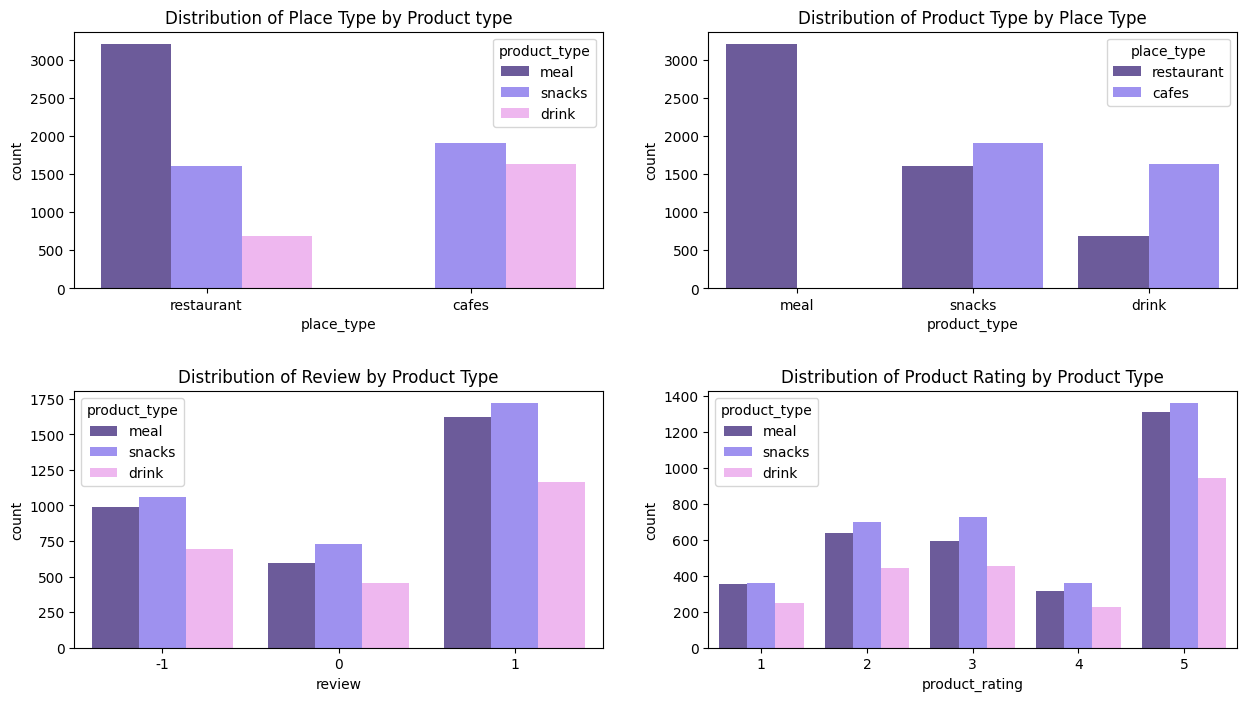

In [152]:
place_color = ["#6750A4", "#9381ff"]
product_color = ["#6750A4", "#9381ff", "#f7aef8"]
nrows, ncols = 2,2
figsize = (15,8)
fig, ax = plt.subplots(nrows, ncols, figsize=figsize)
sns.countplot(data=df, x='place_type', ax=ax[0,0], hue="product_type", palette=product_color)
ax[0,0].set_title("Distribution of Place Type by Product type")

sns.countplot(data=df, x="product_type", ax=ax[0,1], hue="place_type", palette=place_color)
ax[0,1].set_title("Distribution of Product Type by Place Type")

sns.countplot(data=df, x="review", ax=ax[1,0], hue="product_type", palette=product_color)
ax[1,0].set_title("Distribution of Review by Product Type")

sns.countplot(data=df, x="product_rating", ax=ax[1,1], hue="product_type", palette=product_color)
ax[1,1].set_title("Distribution of Product Rating by Product Type")

plt.subplots_adjust(hspace=0.4)
plt.show()

# INSIGHTS
* Restaurant receive more order than cafe
* Snacks have the highest number of orders, followed by meals and  then drinks
* Positive review has the highest count among all the review
* The rating “5” has the highest frequncy



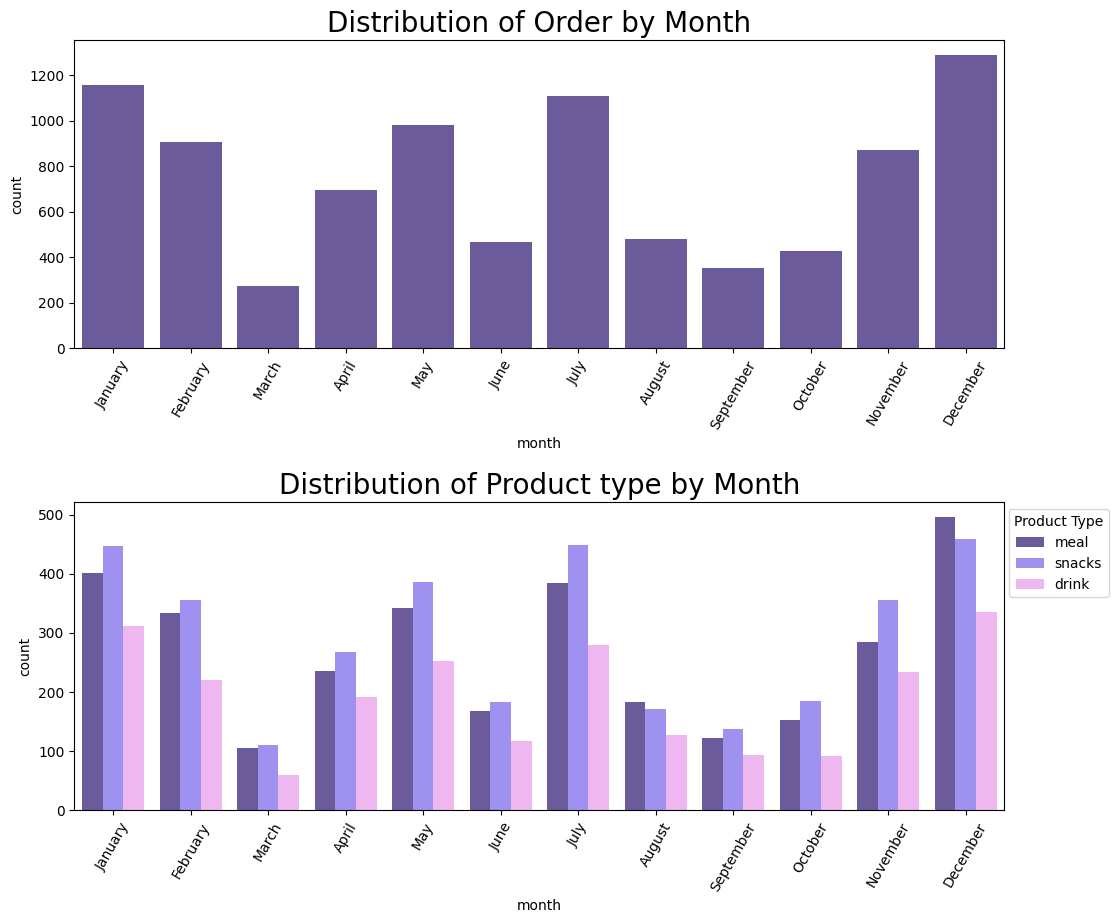

In [197]:
fig,ax = plt.subplots(2,1,figsize=(12,10))
df['month'] = df['date'].dt.month_name()
x_order = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=df, x="month", color="#6750A4", order=x_order, ax=ax[0])
ax[0].set_title("Distribution of Order by Month", size=20)
ax[0].tick_params(axis="x", rotation=60)

sns.countplot(data=df, x="month", order=x_order, hue="product_type", palette=product_color, ax=ax[1])
ax[1].set_title("Distribution of Product type by Month", size=20)
ax[1].tick_params(axis="x", rotation=60)
plt.legend(loc="upper right", bbox_to_anchor=(1.12, 1), title="Product Type")

plt.subplots_adjust(hspace=0.5)
plt.show()

# INSIGHTS
* The highest order occurred in December, followed by January, then July, and May. This dataset is specific to the year 2022,  during which these four months were festive seasons and holidays. May and July were Eid months, while December and January were Christmas and New Year months, coinciding with holidays. Therefore, more orders were placed during these months
* Also snacks has the highest order for all the month except December which is meals


    

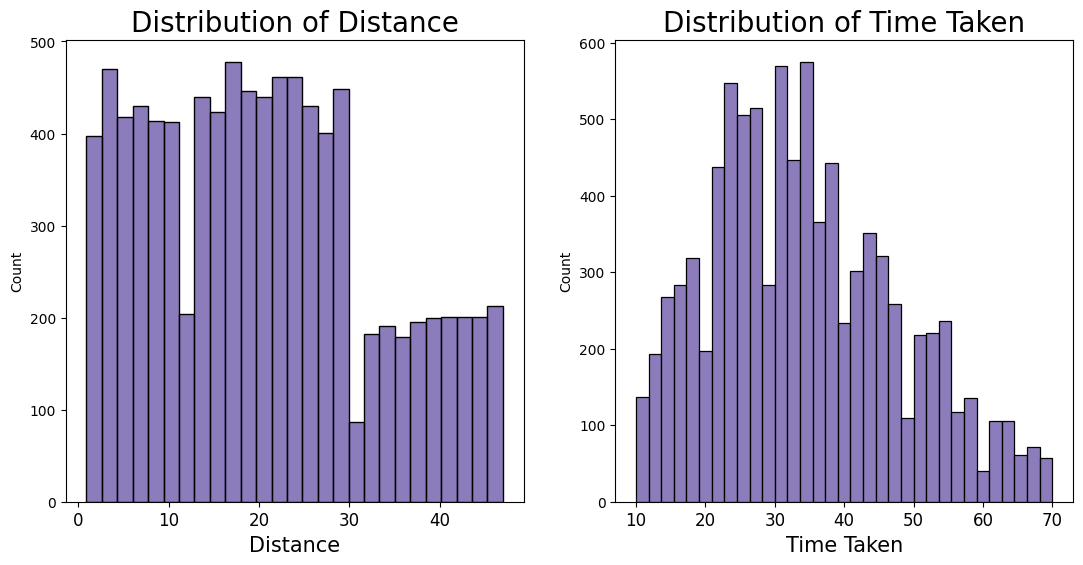

In [155]:
nrows, ncols = 1,2
figsize = (13,6)
fig, ax = plt.subplots(nrows, ncols, figsize=figsize)
sns.histplot(data=df, x='distance', ax=ax[0], color="#6750A4")
ax[0].set_title("Distribution of Distance", size=20)

sns.histplot(data=df, x="time_taken", ax=ax[1], color="#6750A4")
ax[1].set_title("Distribution of Time Taken", size=20)

for idx, val in zip([0,1],["Distance", "Time Taken"]):
    ax[idx].set_xlabel(val, size=15)
    ax[idx].tick_params(axis='x', labelsize=12)

plt.subplots_adjust(hspace=0.4)
plt.show()

### The distance is not normally distributed, while the time taken is skewed to the right

# INSIGHTS
* Orders are fewer for distances greater than 30. This is likely because delivering food to those locations would take a longer time.



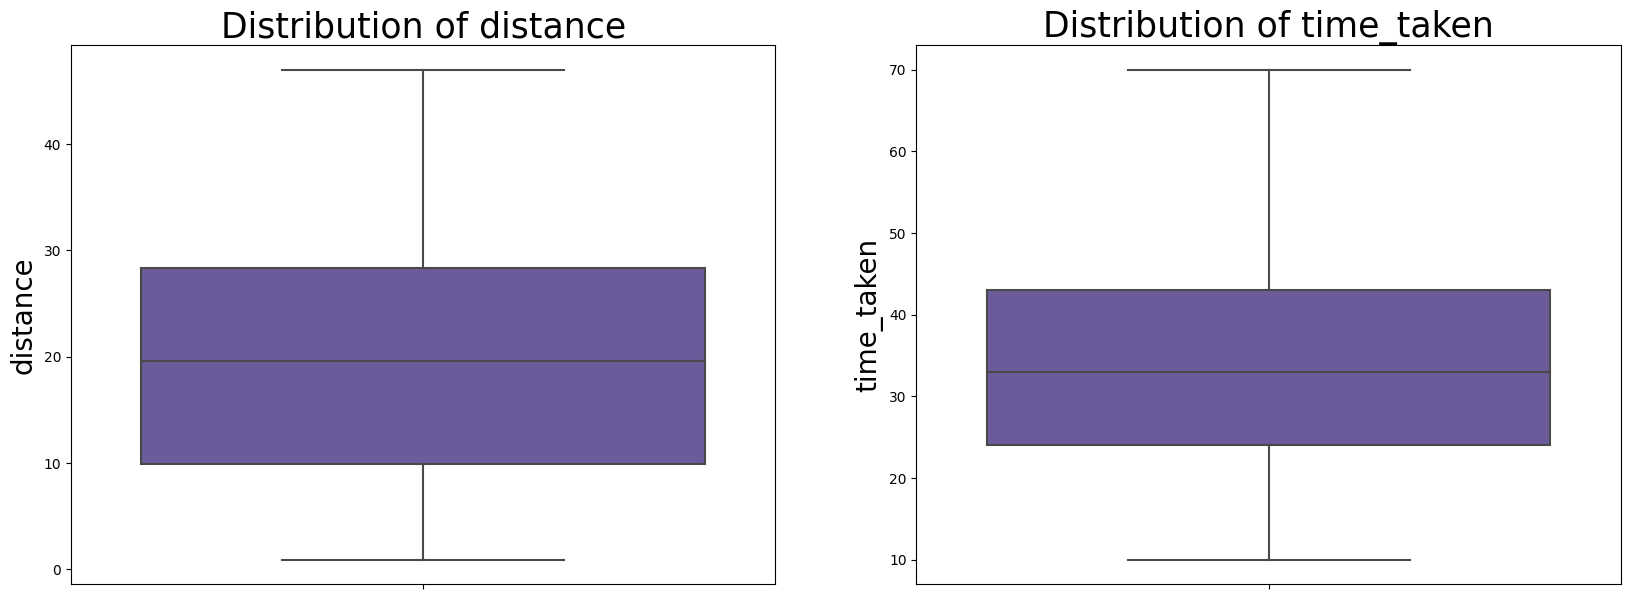

In [156]:
nrows, ncols = 1, 2
figsize = (20, 7)
fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
feat = ["distance", "time_taken"]
for idx, val in enumerate(feat):
    if nrows > 1:
        ax = axs[(idx // ncols), (idx % ncols)]
    else:
        ax = axs[idx]

    sns.boxplot(y=val, data=df, ax=ax, color="#6750A4")
    ax.set_title(f"Distribution of {val}", size=25)
    ax.set_ylabel(val, size=20)
    plt.subplots_adjust(hspace=0.5)

### From the histogram and boxplot charts, it is cleary seen that no outliers in the distance and time taken variables

## Checking the relationship between the numerical variables using heat map

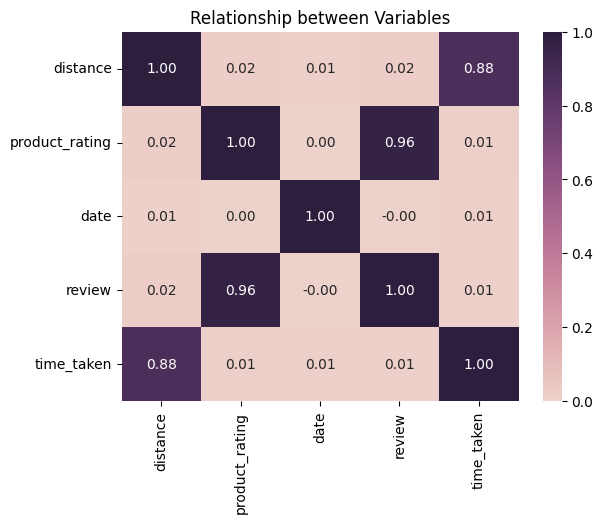

In [157]:
corr_matrix = (df.select_dtypes(exclude="O").drop(columns=["customer_id"])).corr()
cmap = sns.color_palette(["#6750A4"])
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Relationship between Variables")
plt.show()

### From the heatmap, the variables that have relationship are, (time taken and distance) and (product rating and review). The rest has no correlation

#### Let have more view on the correlated variables

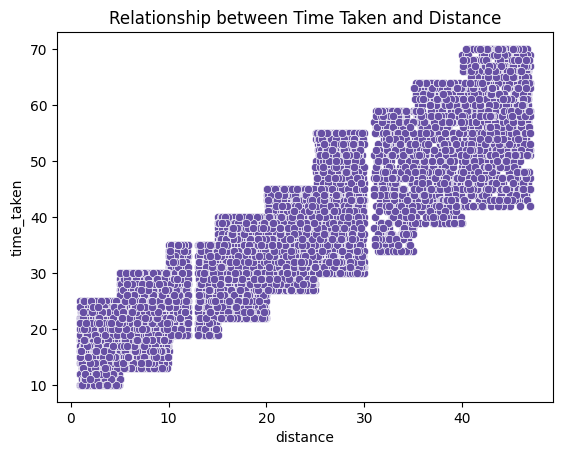

In [158]:
sns.scatterplot(data=df, x="distance", y="time_taken", color="#6750A4")
plt.title("Relationship between Time Taken and Distance")
plt.show()

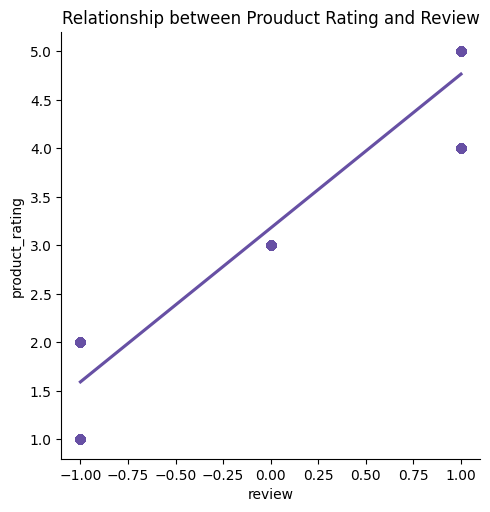

In [159]:
sns.lmplot(data=df, x="review", y="product_rating", scatter_kws={'color': "#6750A4"}, line_kws={'color': "#6750A4"})
plt.title("Relationship between Prouduct Rating and Review")
plt.show()

### Checking relationship between time taken and other categorical variables using boxplot

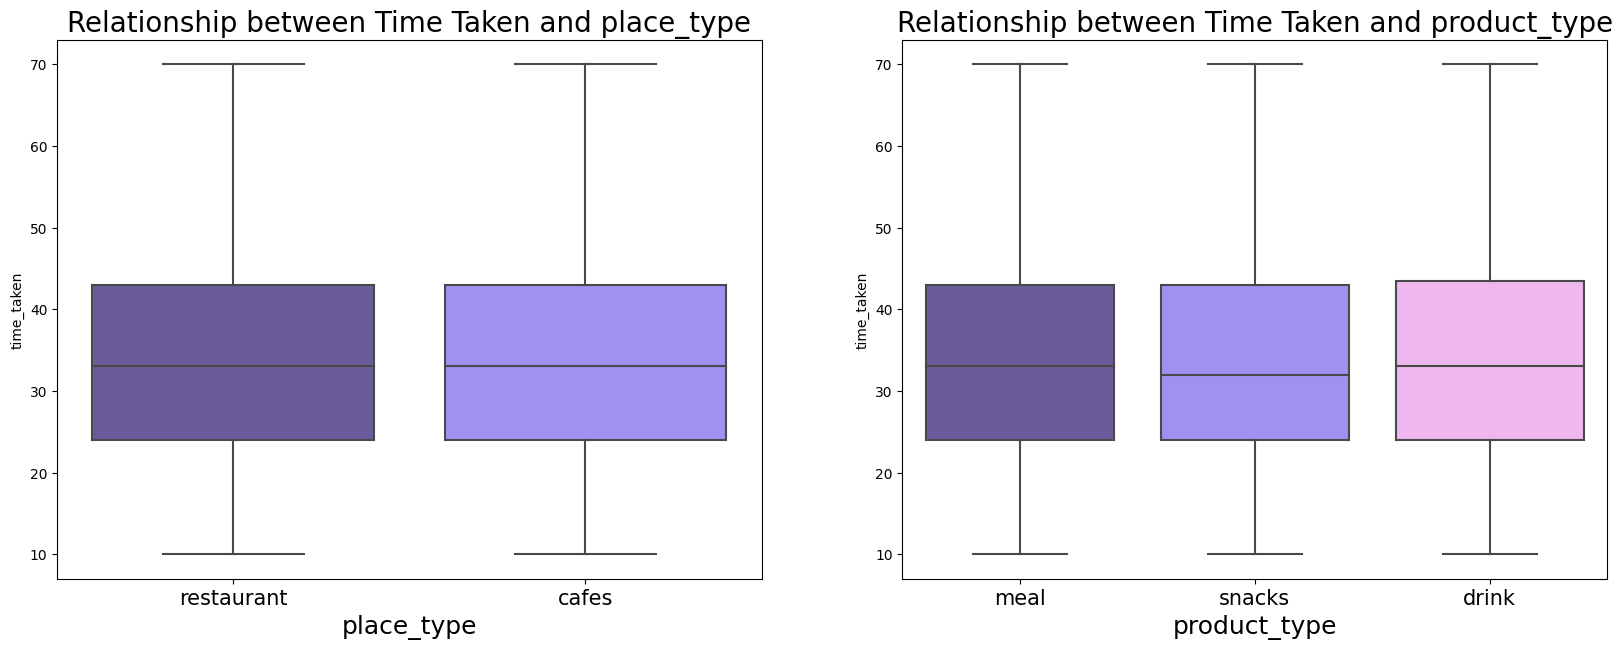

In [160]:
nrows, ncols = 1,2
fig, ax = plt.subplots(nrows, ncols, figsize=figsize)
feat = ["place_type", "product_type"]
for idx, var in enumerate(feat):
    if nrows > 1:
        axs = ax[(idx // ncols), (idx % ncols)]
    else:
        axs = ax[idx]
        
    sns.boxplot(data=df, y='time_taken', x=var, ax=axs, palette=product_color)
    axs.set_title(f"Relationship between Time Taken and {var}", size=20)
    axs.set_xlabel(var, size=18)
    axs.tick_params(axis='x', labelsize=15)

# INSIGHTS
* The time taken for delivery shows a positive relationship with the distance between the restaurant and customer locations. In other words, the greater the distance, the longer it takes to deliver the item(s).
* There is a positive relationship between product rating and review sentiment. Higher product ratings generally correspond to positive reviews, while ratings around three indicate neutral reviews. Lower ratings typically indicate negative reviews.
* There is no relationship between time taken and product type, or place type
* The only relationship with time taken is distance, so distance was the only variable used in predicting time taken


# FUTURE ENGINEERING
* The distance feature is not normally distributed, we will descritize it into three parts

In [23]:
#create a new column new distance
df["new_distance"] = df["distance"].copy()

In [24]:
# function to descritize the distance
def discetize_var(*, data: pd.DataFrame) -> pd.DataFrame:
    bins = 11
    LABELS = np.arange(bins)
    data["new_distance"] = pd.qcut(
        x=data["new_distance"], q=bins, labels=LABELS, duplicates="drop"
    ).astype(int)
    return data

In [25]:
# split the data before and then appying future engineering
from sklearn.model_selection import train_test_split

# split the data into two
X = df[["new_distance"]]  
y = df["time_taken"]

RANDOM_STATE = 123
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size=TEST_SIZE)
print(X_train.shape)
print(X_test.shape)

(7219, 1)
(1805, 1)


In [26]:
# descritize the X_train distance
discetize_var(data=X_train)

# descritizing the X_test distance
discetize_var(data=X_test)
X_train

,new_distance
5199,7
583,5
6656,0
7059,0
4348,1
...,...
7382,0
7763,7
5218,0
1346,4


# PREDICTING THE TIME TAKEN

In [27]:
# import the necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import  LogisticRegression, LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [28]:
def result_df(*, true_val: np.ndarray, y_pred: pd.core.series) -> pd.DataFrame:
    """ This function crates a dataframe for the true value and predicted values"""
    df = pd.DataFrame()

    df["Actual_val"] = true_val  # make sure to add the actual variable first
    df["predicted_val"] = y_pred
    df["Error_in_prediction"] = df["Actual_val"] - df["predicted_val"]
    return df

In [29]:
def evaluation(*, y_true: np.ndarray, y_pred: pd.Series, model_type: str)->pd.DataFrame:
    """ This function find all the four metric for regression model
    
        param:
          y_true-> is the actual values which is in series
          y_pred -> is the predicted values which is an array
          model_type -> is in string which is the type of model for the values
          
        param:
          returns a dataframe showing a score of each metric
    """
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    
    # R-squared (R2) Score
    r2 = r2_score(y_true, y_pred)
    
    dict_ = {
            "Mean Square Error": mse,
            "Root Mean Square Error": rmse,
            "Mean Absolute Error":mae,
            "R-Squared": r2,
        }
    index_ = ["Value"]

    df = (
          pd.DataFrame(dict_, index=index_)
        .T.reset_index()
          .rename(columns={"index": "Metrics", "Value": model_type})
    )
    return df

In [30]:
# instantiate the model
linear_reg = LinearRegression()
RF_reg = RandomForestRegressor(random_state=RANDOM_STATE)
DT_reg = DecisionTreeRegressor(random_state=RANDOM_STATE)

In [31]:
# predict using decision tree regressor
DT_reg.fit(X_train, y_train)
# Make predictions
y_pred_1 = np.round(DT_reg.predict(X_test)).astype(int)
eval_decision = evaluation(y_pred=y_pred_1, y_true=y_test, model_type="decision tree")
result = result_df(true_val=y_test, y_pred=y_pred_1)

#result.sample(n=10, random_state=RANDOM_STATE)

In [32]:
# predict using linear regressor
linear_reg.fit(X_train, y_train)
# Make predictions
y_pred_2 = np.round(linear_reg.predict(X_test)).astype(int)
eval_linear = evaluation(y_pred=y_pred_2, y_true=y_test, model_type="linear regression")
result = result_df(true_val=y_test, y_pred=y_pred_1)
#result.sample(n=10, random_state=RANDOM_STATE)

In [33]:
# predict using the random forest regressor
RF_reg.fit(X_train, y_train)
# Make predictions
y_pred_3 = np.round(RF_reg.predict(X_test)).astype(int)
eval_RF = evaluation(y_pred=y_pred_3, y_true=y_test, model_type="Random forest")
result = result_df(true_val=y_test, y_pred=y_pred_1)
#result.sample(n=10, random_state=RANDOM_STATE)

In [34]:
# compare the metric
eval_RF.merge(eval_decision).merge(eval_linear, on="Metrics")

,Metrics,Random forest,decision tree,linear regression
0,Mean Square Error,40.034903,40.034903,42.475900
1,Root Mean Square Error,6.327314,6.327314,6.517354
2,Mean Absolute Error,5.269252,5.269252,5.360111
3,R-Squared,0.779009,0.779009,0.765535


In [35]:
# compare the metric
eval_RF.merge(eval_decision).merge(eval_linear, on="Metrics")

,Metrics,Random forest,decision tree,linear regression
0,Mean Square Error,40.034903,40.034903,42.475900
1,Root Mean Square Error,6.327314,6.327314,6.517354
2,Mean Absolute Error,5.269252,5.269252,5.360111
3,R-Squared,0.779009,0.779009,0.765535


#### From the result, random forest and decision tree have the same score and have the highest score compare to linear regression


In [36]:
# validate more
val1 = 80
val2 = 78
val3 = 32
val4 = 0.7
val5 = 21
val6 = 99
val7 = 21

print(f"predicted time taken for {val1} distance is {np.round(DT_reg.predict([[val1]])).astype(int)} minutes")
print(f"predicted time taken for {val2} distance is {np.round(DT_reg.predict([[val2]])).astype(int)} minutes")
print(f"predicted time taken for {val3} distance is {np.round(DT_reg.predict([[val3]])).astype(int)} minutes")
print(f"predicted time taken for {val4} distance is {np.round(DT_reg.predict([[val4]])).astype(int)} minutes")
print(f"predicted time taken for {val5} distance is {np.round(DT_reg.predict([[val5]])).astype(int)} minutes")
print(f"predicted time taken for {val6} distance is {np.round(DT_reg.predict([[val6]])).astype(int)} minutes")
print(f"predicted time taken for {val7} distance is {np.round(DT_reg.predict([[val7]])).astype(int)} minutes")

predicted time taken for 80 distance is [57] minutes
predicted time taken for 78 distance is [57] minutes
predicted time taken for 32 distance is [57] minutes
predicted time taken for 0.7 distance is [21] minutes
predicted time taken for 21 distance is [57] minutes
predicted time taken for 99 distance is [57] minutes
predicted time taken for 21 distance is [57] minutes


the above result is poor because it kept predicting the same time, this might be because the distance was discretized

## Prediction without discretizing the distance variable

In [37]:
# split the data into two
X = df[["distance"]]  
y = df["time_taken"]

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, random_state=RANDOM_STATE, test_size=TEST_SIZE)
print(X_trn.shape)
print(X_tst.shape)

(7219, 1)
(1805, 1)


In [38]:
# instantiate the model
linear_reg1 = LinearRegression()
RF_reg1 = RandomForestRegressor(random_state=RANDOM_STATE)
DT_reg1 = DecisionTreeRegressor(random_state=RANDOM_STATE)

In [39]:
# predict using decision tree regressor
DT_reg1.fit(X_trn, y_trn)
# Make predictions
y_pred_1 = np.round(DT_reg1.predict(X_tst)).astype(int)
eval_decision1 = evaluation(y_pred=y_pred_1, y_true=y_test, model_type="decision tree")

# predict using linear regressor
linear_reg1.fit(X_trn, y_trn)
# Make predictions
y_pred_2 = np.round(linear_reg1.predict(X_tst)).astype(int)
eval_linear1 = evaluation(y_pred=y_pred_2, y_true=y_test, model_type="linear regression")

# predict using the random forest regressor
RF_reg1.fit(X_trn, y_trn)
# Make predictions
y_pred_3 = np.round(RF_reg1.predict(X_tst)).astype(int)
eval_RF1 = evaluation(y_pred=y_pred_3, y_true=y_test, model_type="Random forest")

In [40]:
# compare the metric
eval_RF1.merge(eval_decision1).merge(eval_linear1, on="Metrics")

,Metrics,Random forest,decision tree,linear regression
0,Mean Square Error,51.714681,61.664820,39.194460
1,Root Mean Square Error,7.191292,7.852695,6.260548
2,Mean Absolute Error,5.804432,6.237673,5.232133
3,R-Squared,0.714537,0.659613,0.783648


### Because the relationship between the two variables are linear, Here the linear regression model performs better and performs more better compare to the the other metrics score when the distance data was discretized

In [41]:
# validate more
val1 = 80
val2 = 78
val3 = 32
val4 = 0.7
val5 = 21
val6 = 99
val7 = 34

print(f"predicted time taken for {val1} distance is {np.round(linear_reg1.predict([[val1]])).astype(int)} minutes")
print(f"predicted time taken for {val2} distance is {np.round(linear_reg1.predict([[val2]])).astype(int)} minutes")
print(f"predicted time taken for {val3} distance is {np.round(linear_reg1.predict([[val3]])).astype(int)} minutes")
print(f"predicted time taken for {val4} distance is {np.round(linear_reg1.predict([[val4]])).astype(int)} minutes")
print(f"predicted time taken for {val5} distance is {np.round(linear_reg1.predict([[val5]])).astype(int)} minutes")
print(f"predicted time taken for {val6} distance is {np.round(linear_reg1.predict([[val6]])).astype(int)} minutes")
print(f"predicted time taken for {val7} distance is {np.round(linear_reg1.predict([[val7]])).astype(int)} minutes")

predicted time taken for 80 distance is [92] minutes
predicted time taken for 78 distance is [90] minutes
predicted time taken for 32 distance is [46] minutes
predicted time taken for 0.7 distance is [15] minutes
predicted time taken for 21 distance is [35] minutes
predicted time taken for 99 distance is [110] minutes
predicted time taken for 34 distance is [47] minutes


# Conclusion
### Hyper parameter tuning is not needed as there are no specific hyperparameters to tune since the model is not complex and does not have parameters that require regularization or tuning.
### I will utilize a linear regression model for production without performing any feature engineering on the distance variable.

### SAVING THE MODEL

In [42]:
model = LinearRegression()
final_model = model.fit(X_trn, y_trn)

In [43]:
import pickle
# saving the model
with open('model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

In [44]:
# loading it
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [45]:

loaded_model.predict([[100]])

array([111.23502046])

# RECOMMENDATION

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

In [47]:
df['product'] = df['product'].str.replace('\xa0', '')

### We will try different combination to see which on works better

In [48]:
# makint different commbination
feat1 = df["product_description"] + " " + df["product_type"] + " " + df["place_type"]
feat2 = df["product_description"] + " " + df["product_type"]
feat3 = df["product_description"] + " "  + df["place_type"]

In [49]:
# instantiating the vectorizer and also removing stopwords
tfidf = TfidfVectorizer(stop_words="english")

In [50]:
# vectorizing the different combination
tfidf_matrix = tfidf.fit_transform(df["product_description"])
tfidf_matrix1 = tfidf.fit_transform(feat1)
tfidf_matrix2 = tfidf.fit_transform(feat2)
tfidf_matrix3 = tfidf.fit_transform(feat3)

In [51]:
# applyung cosine similarity to each 
cos_sim = cosine_similarity(tfidf_matrix)
cos_sim1 = cosine_similarity(tfidf_matrix1)
cos_sim2 = cosine_similarity(tfidf_matrix2)
cos_sim3 = cosine_similarity(tfidf_matrix3)

In [52]:
def get_recommendations(*, customer_id, cos_similarity):
    """ This function get the product recommendation for a specified user based in his/her last orde
    """

    # get customers previous order item
    customer_last_order = (df[df["customer_id"] == customer_id]["product"]).to_list()[-1]
    
    indices = pd.Series(df["product"]).drop_duplicates()
    indices = pd.Series(indices.index, index=indices.values)
    
    idx = indices[customer_last_order]
    sim = enumerate(cos_similarity[idx])
    sim = sorted(sim, key=lambda x: x[1], reverse=True)
    #sim = sim[1:11]
    
    sim_index = [i[0] for i in sim]
    sim_data = (df["product"].iloc[sim_index]).drop_duplicates()
    return (sim_data[:10]).values.tolist()

    

In [53]:
# trying the first description only
get_recommendations(customer_id=10, cos_similarity = cos_sim)

['Plantain Puff Puff',
 'Spicy Puff Puff',
 'Puff Puff',
 'Chicken Pie',
 'Yam Porridge with Plantains',
 'West African Coconut Rice',
 'Okro Pepper Soup',
 'Fried plantains',
 'Grilled Plantains',
 'Plantain fufu']

In [54]:
# tring the first combination
get_recommendations(customer_id=10, cos_similarity = cos_sim1)

['Plantain Puff Puff',
 'Spicy Puff Puff',
 'Puff Puff',
 'Chicken Pie',
 'Yam Porridge with Plantains',
 'West African Coconut Rice',
 'Okro Pepper Soup',
 'Fried plantains',
 'Zobo',
 'Grilled Plantains']

In [55]:
# tring the second combination
get_recommendations(customer_id=10, cos_similarity = cos_sim2)

['Plantain Puff Puff',
 'Spicy Puff Puff',
 'Puff Puff',
 'Chicken Pie',
 'Yam Porridge with Plantains',
 'West African Coconut Rice',
 'Okro Pepper Soup',
 'Fried plantains',
 'Grilled Plantains',
 'Plantain fufu']

In [56]:
# tring the third
get_recommendations(customer_id=10, cos_similarity = cos_sim3)

['Plantain Puff Puff',
 'Spicy Puff Puff',
 'Puff Puff',
 'Chicken Pie',
 'Yam Porridge with Plantains',
 'West African Coconut Rice',
 'Okro Pepper Soup',
 'Fried plantains',
 'Zobo',
 'Grilled Plantains']

#### Since all the combination gives the same result we, are going for  product description only

## Making the recommendation to also display the restuarant name and also handle customers that have not made any orders

In [57]:
def recommendations(*, customer_id, cos_similarity):
    """ This function get the product recommendation for a specified user based in his/her last orde
    """
    recommended_items = []
    # if customer made order
    if customer_id in df["customer_id"].to_list():
        # get customers previous order item
        customer_last_order = (df[df["customer_id"] == customer_id]["product"]).to_list()[-1]
        
        indices = pd.Series(df["product"].str.strip()).drop_duplicates()
        indices = pd.Series(indices.index, index=indices.values)
        
        idx = indices[customer_last_order]
        sim = enumerate(cos_similarity[idx])
        sim = sorted(sim, key=lambda x: x[1], reverse=True)
        #sim = sim[1:11]
        
        sim_index = [i[0] for i in sim]
        sim_data = (df["product"].iloc[sim_index]).drop_duplicates()
        top_10 = sim_data[:10].values.tolist() 
        for i in top_10:
            details = df[df["product"]== i].sort_values(by="product_rating", ascending=False)[
                ["product","place_name"]].values[0].tolist()
            recommended_items.append(details)
    
    # if customer has not make any order yet
    else:
        recommended_items = df.sort_values(by="product_rating",
                                            ascending=False)[["product","place_name"]].drop_duplicates().values[:10].tolist()
    return recommended_items
    

In [58]:
# checking to see of it works
recommendations(customer_id=10, cos_similarity = cos_sim)

[['Plantain Puff Puff', 'Vestar Coffee'],
 ['Spicy Puff Puff', 'Rehoboth Delicious'],
 ['Puff Puff', 'La Pointe Cafe'],
 ['Chicken Pie', 'Pause | Café & Espresso Bar'],
 ['Yam Porridge with Plantains', 'Labamba Restaurant'],
 ['West African Coconut Rice', 'Karma Restaurant'],
 ['Okro Pepper Soup', 'La Giara Restaurant'],
 ['Fried plantains', 'Double Four Restaurant & Eatery'],
 ['Grilled Plantains', 'Double Four Restaurant & Eatery'],
 ['Plantain fufu', 'Demmies Delight']]

In [59]:
print("check for customer not in the order data")
recommendations(customer_id=-1, cos_similarity=cos_sim)

check for customer not in the order data


[['Moin/Moi Moi', 'Topever Restaurant'],
 ['fura da nono', 'Eric Kayer'],
 ['Martini', 'Chadon Kitchen'],
 ['Hearty Salmon Stew', 'Mama Cass Restaurants Limited'],
 ['West African Coconut Rice', 'Karma Restaurant'],
 ['Zobo', 'Moonshine Cafe'],
 ['Plantain fufu', 'Topever Restaurant'],
 ['Ata Lilo (Starter Sauce', 'Cheesy Restaurant & Snacks Bar'],
 ['Kunun zaki', 'Pause | Café & Espresso Bar'],
 ['Chicken Pie', 'Stories Lagos']]

# Conclusion:
### The recommender system provides the top ten recommended products based on the customer's last order. Since some of these products are available in different restaurants, the system also considers the highest ratings for each recommended product, along with the corresponding restaurant name. In cases where the customer has not made any previous orders, the system recommends the top ten products with the highest ratings.

### Saving the cosine similarity and the dataframe using pickle


In [60]:
import pickle

In [61]:
# saving the similarity
pickle.dump(cos_sim, open("similarityV2.pkl", "wb"))

In [62]:
# load the similarrity
cos =  pickle.load(open("similarityV2.pkl", "rb"))

In [63]:
# saving the data
pickle.dump(df, open("data.pkl", "wb"))